In [1]:
import os
import sys
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import MDAnalysis as mda
from MDAnalysis.analysis import distances
from tqdm import tqdm
from numpy import linalg as LA
from scipy.signal import lfilter

sys.path.append("../py_modules/")

from utils import sparse_to_full, triu_to_full

In [2]:
%run ~/.mpl_set.py

In [3]:
nsp10_int_res = np.array([[4293, 4300], [4322, 4337], [4346, 4349]])
nsp16_int_res = np.array([[6835, 6846], [6874, 6889], [6900, 6908], [7042, 7046]])

# expand the res
nsp10_int_res = np.array([[i[0]-5, i[1]+5] for i in nsp10_int_res])
nsp16_int_res = np.array([[i[0]-5, i[1]+5] for i in nsp16_int_res])

# resid realign
nsp10_res0 = 4271
nsp16_res0 = 6798
nsp10_int_res = nsp10_int_res - nsp10_res0
nsp16_int_res = nsp16_int_res - nsp16_res0 

In [4]:
df = pd.read_pickle('cm_cluster.pkl')

In [5]:
cm0 = df.iloc[0]['contact_map']

In [16]:
def cm_to_patches(cm, x_lists, y_lists, gap=0): 
    # get size 
    x_size = np.sum([i[1] - i[0] for i in x_lists]) +gap * len(x_lists) +gap
    y_size = np.sum([i[1] - i[0] for i in y_lists]) +gap * len(y_lists) +gap
    # get empty nan array
    patches = np.empty((x_size, y_size))
    patches[:] = np.nan 
    # fill the cm
    x_start =gap
    for i, x_res in enumerate(x_lists): 
        y_start =gap
        for j, y_res in enumerate(y_lists): 
            patch = cm[x_res[0]:x_res[1], y_res[0]:y_res[1]]
#             print(patch.shape)
            x_len, y_len = patch.shape
            patches[x_start: x_start + x_len, y_start: y_start + y_len] = patch
            y_start = y_start + y_len +gap 
        x_start = x_start + x_len +gap
    return patches

# cm_to_patches(cm0, x_lists, y_lists)

(-0.5, 58.5, 82.5, -0.5)

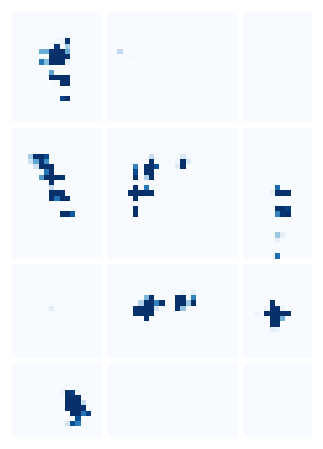

In [17]:
fig, axes = plt.subplots(figsize=(10, 8)) 

plt.imshow(cm_to_patches(cm0.T, nsp16_int_res, nsp10_int_res, gap=1), cmap='Blues')
plt.axis('off')
# plt.colorbar()

In [18]:
fig_savepath = 'cm_cluster'
os.makedirs(fig_savepath, exist_ok=True)

for i, row in df.iterrows(): 
    cm = row['contact_map']
    sys_name = row['sys_name']
    cluster_name = row['cluster_name']
    
    sys_path = f'{fig_savepath}/{sys_name}'
    os.makedirs(sys_path, exist_ok=True)
    
    save_fig = f'{sys_path}/{cluster_name}.png'
    fig, ax = plt.subplots(figsize=(10, 8)) 
    plt.imshow(cm_to_patches(cm, nsp10_int_res, nsp16_int_res, gap=1), cmap='Blues')
    plt.axis('off')
    fig.savefig(save_fig, dpi=300, bbox_inches='tight')

/homes/heng.ma/miniconda3/envs/MD_ff/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


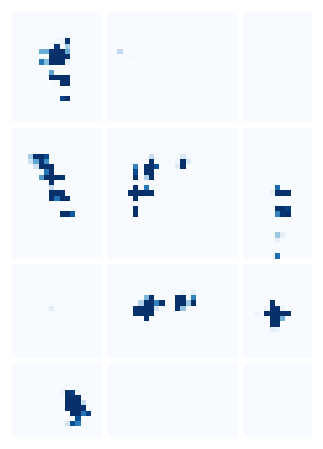

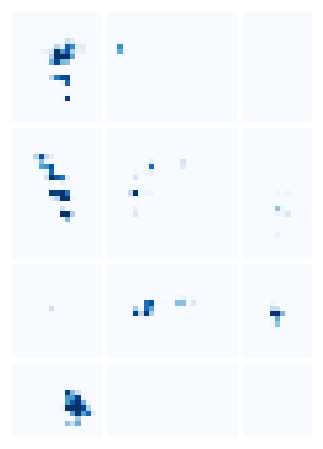

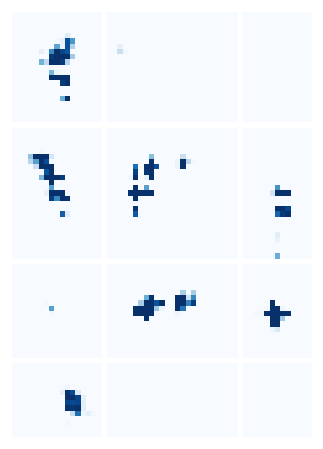

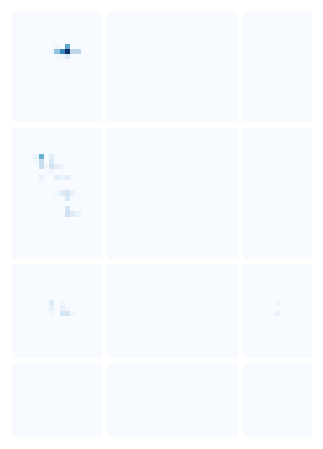

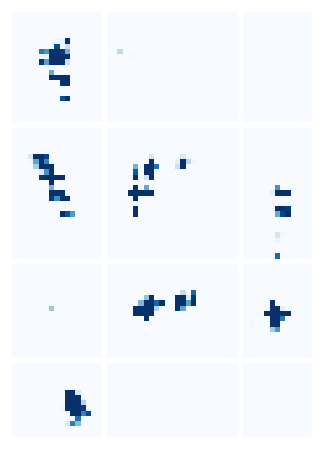

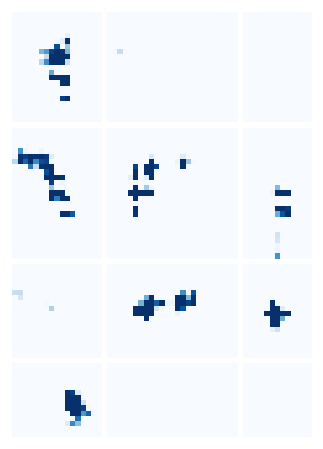

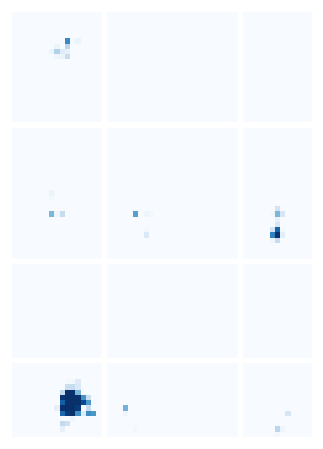

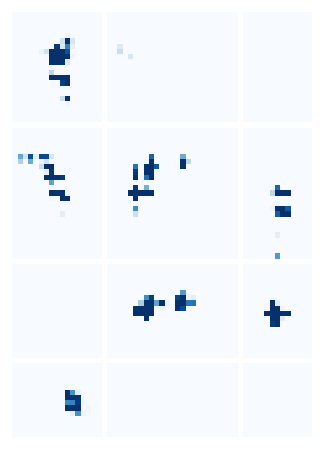

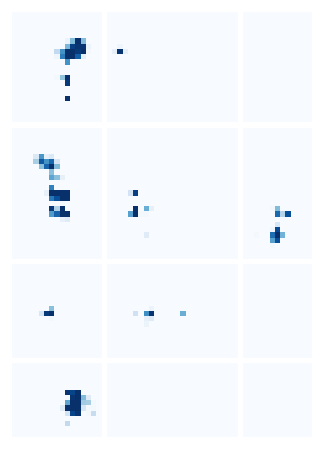

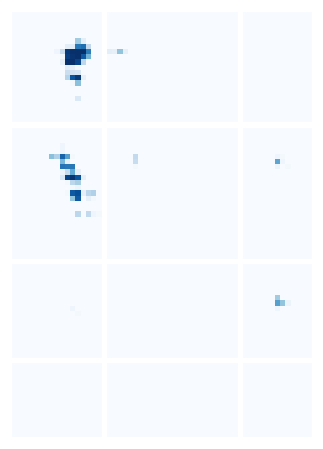

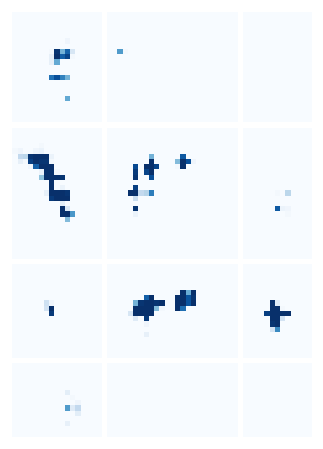

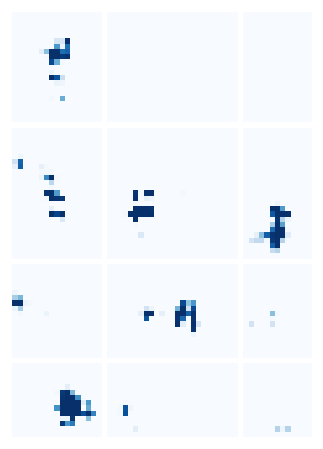

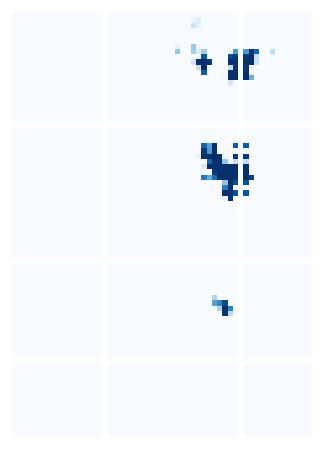

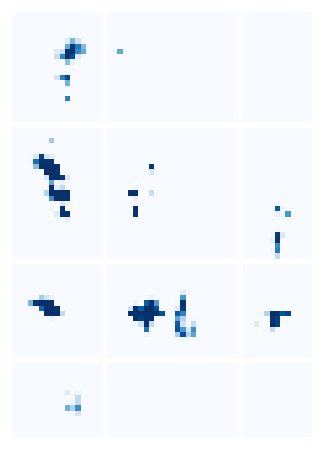

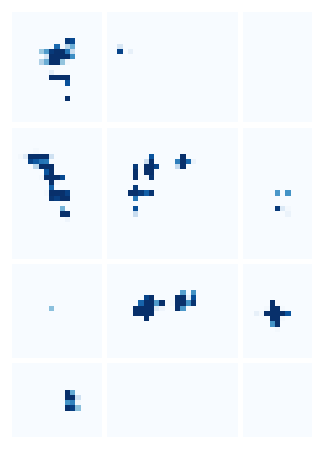

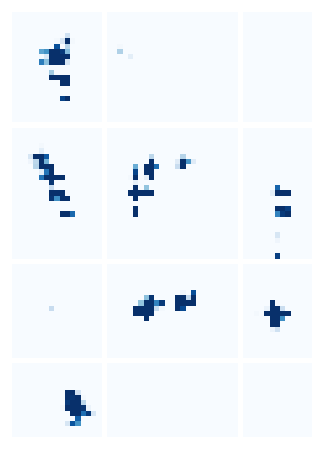

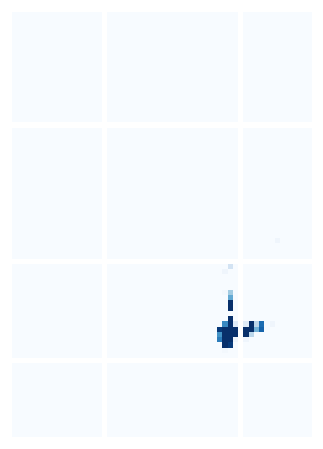

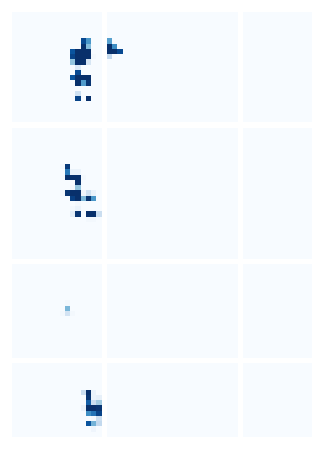

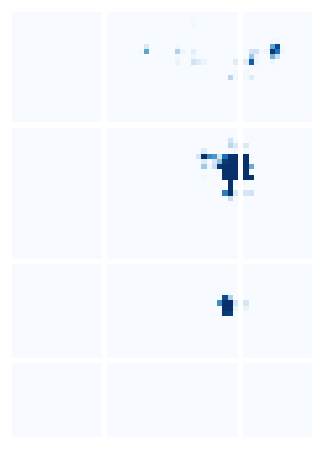

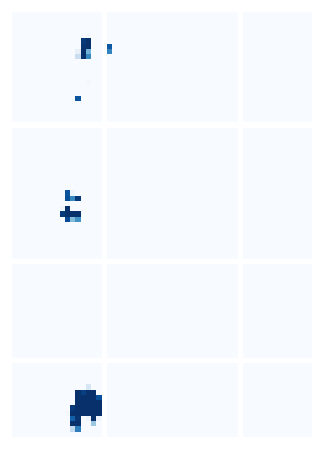

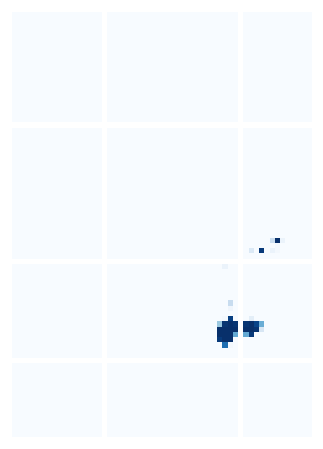

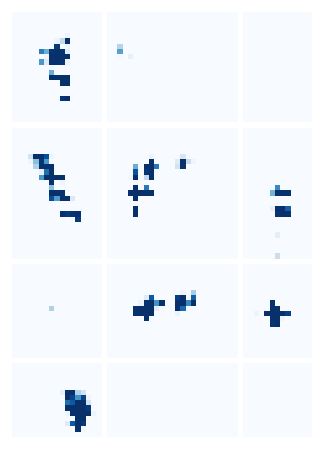

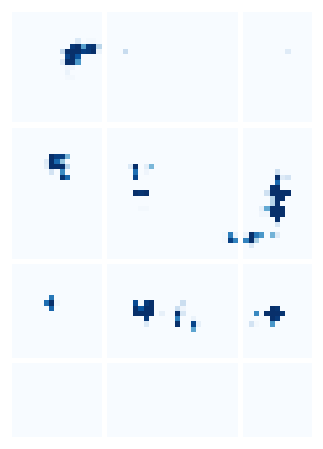

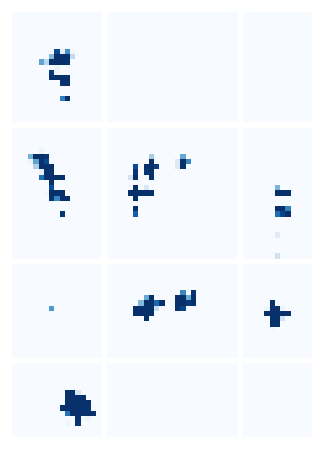

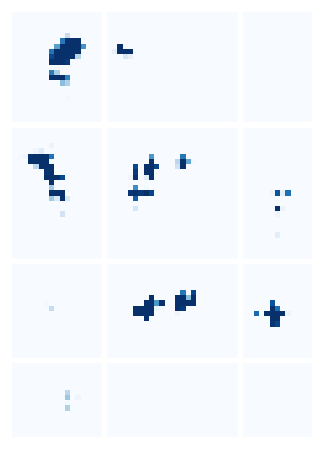

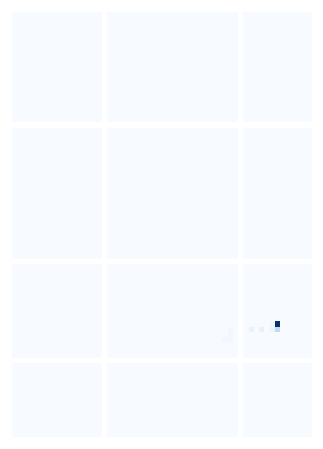

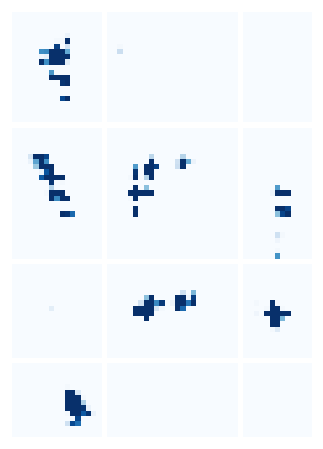

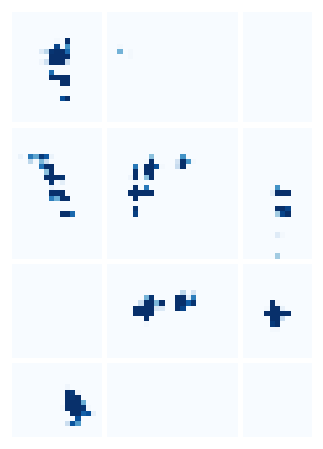

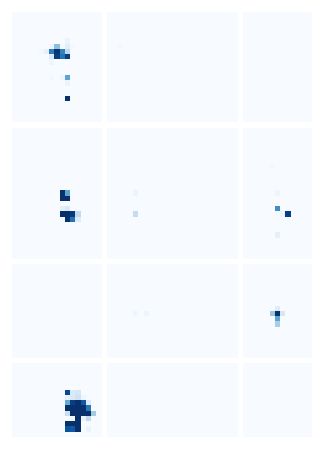

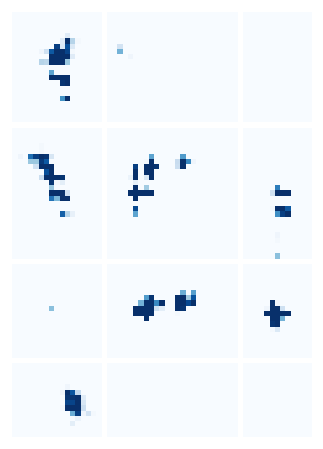

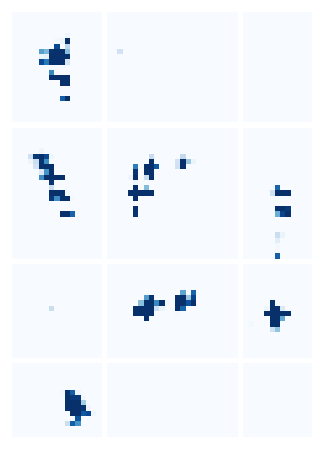

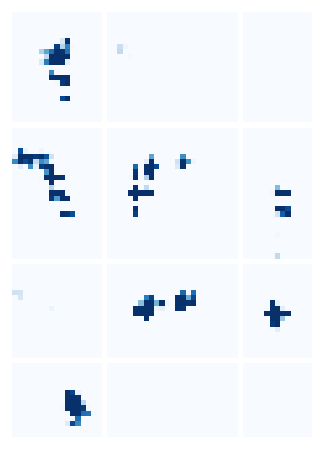

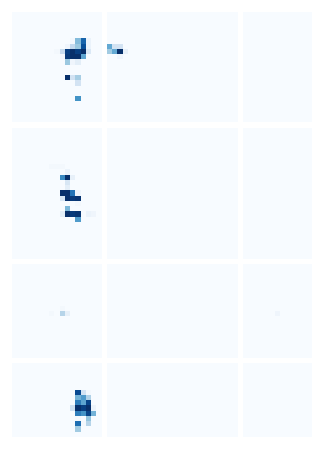

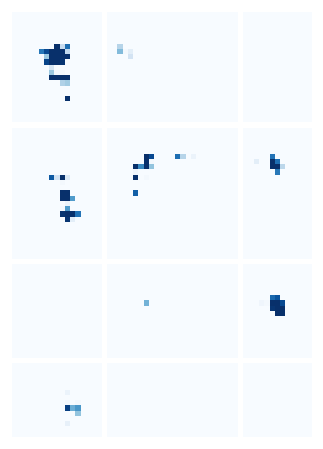

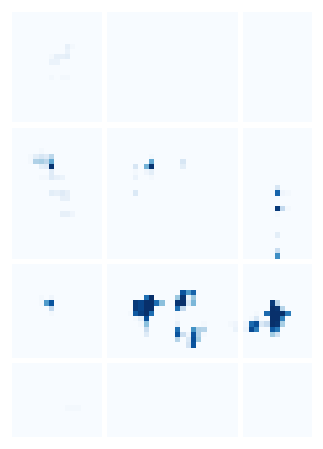

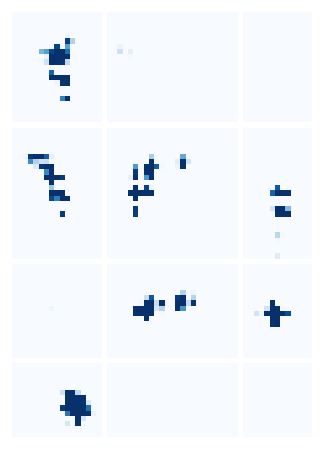

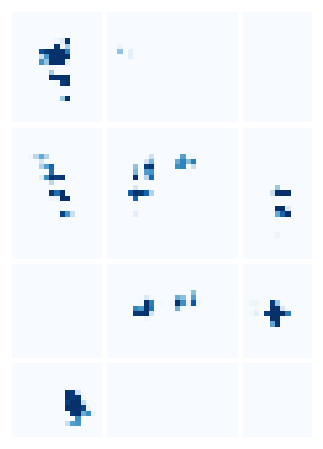

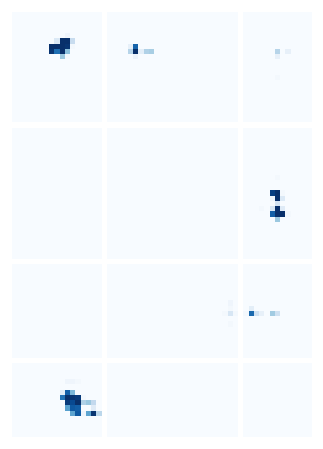

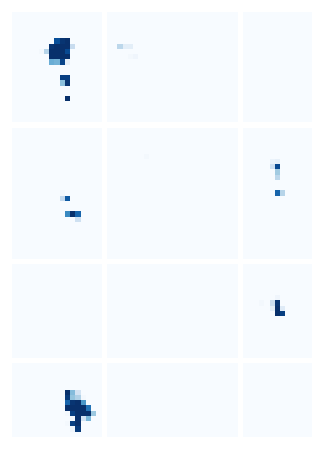

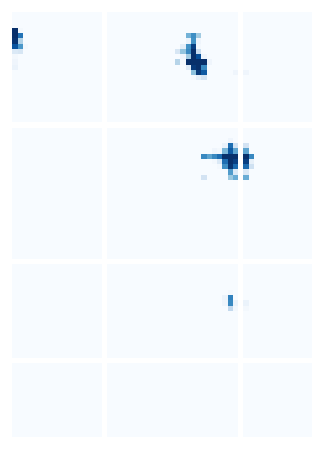

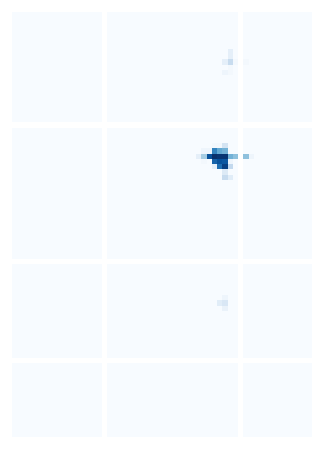

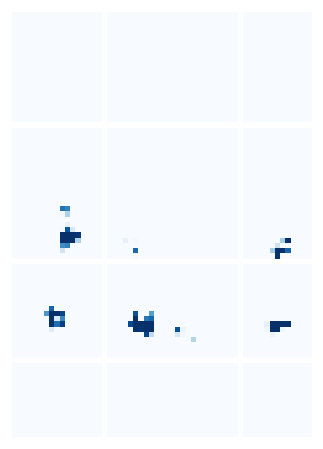

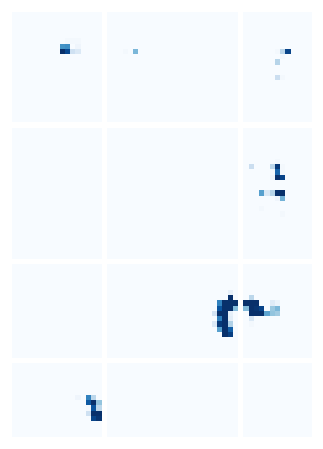

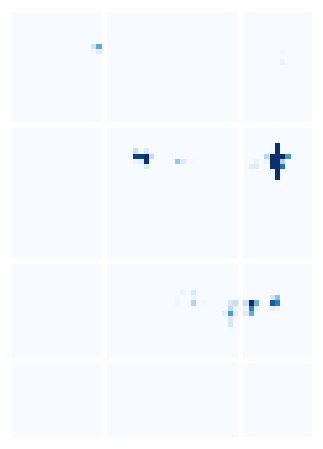

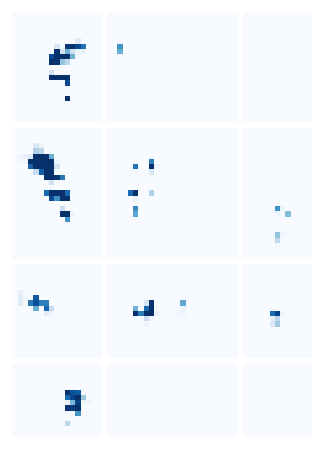

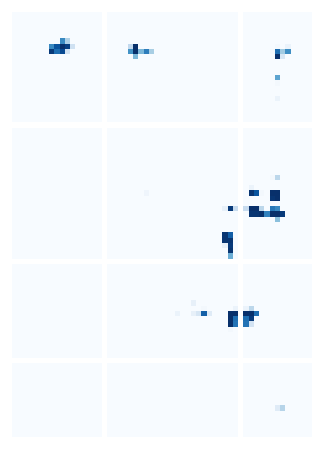

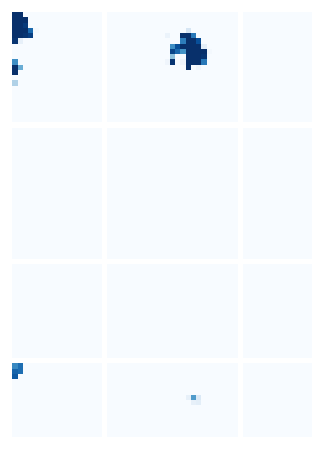

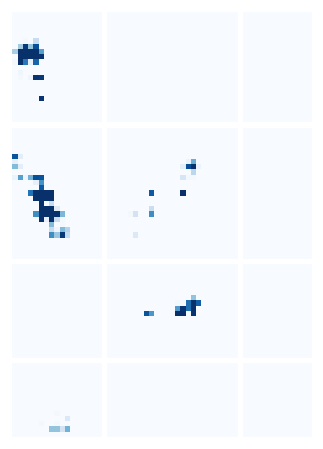

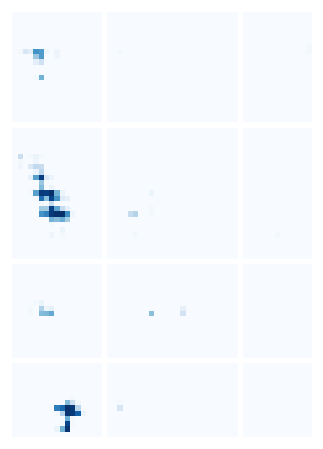

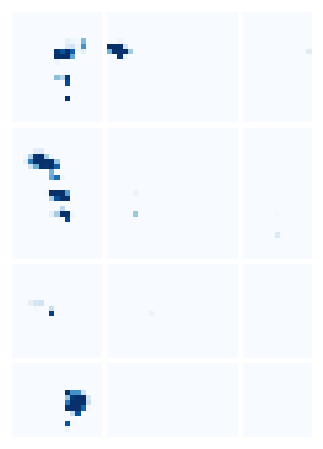

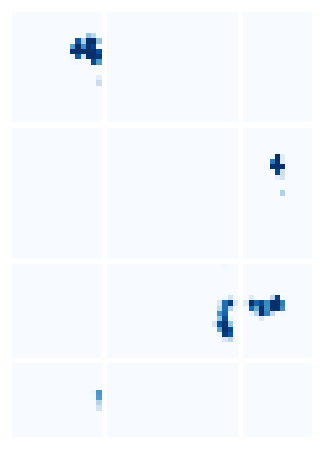

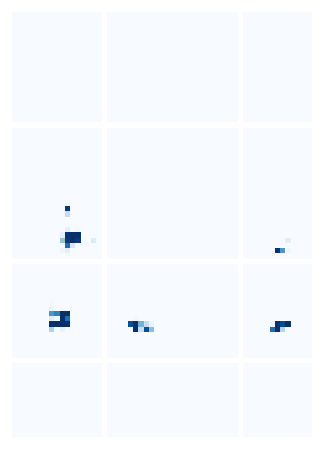

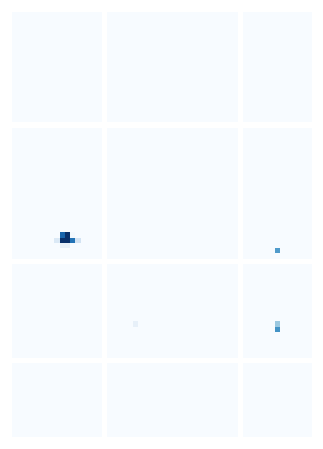

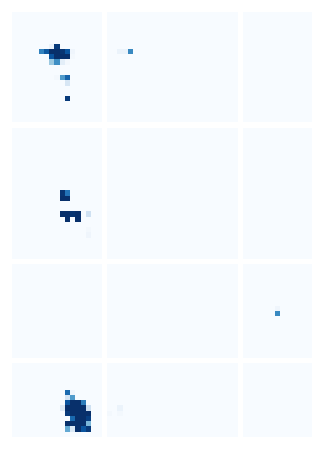

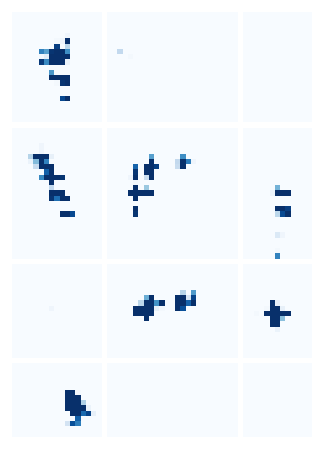

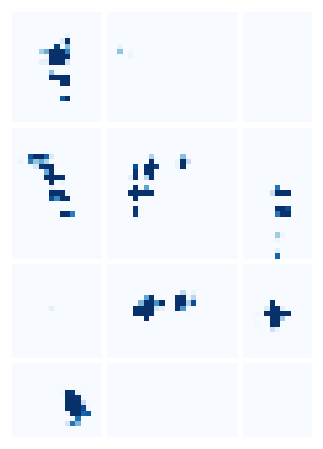

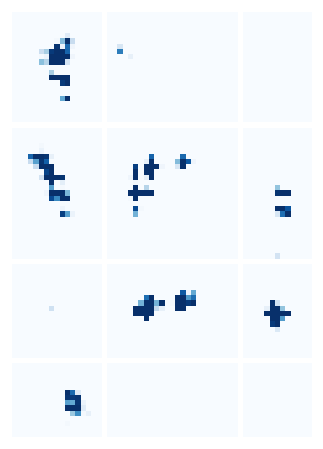

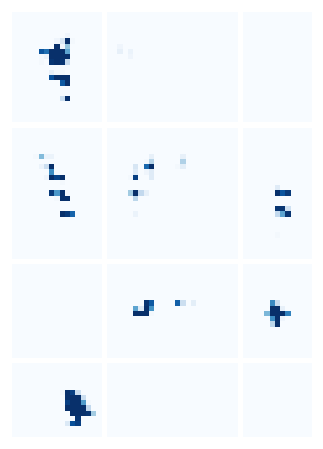

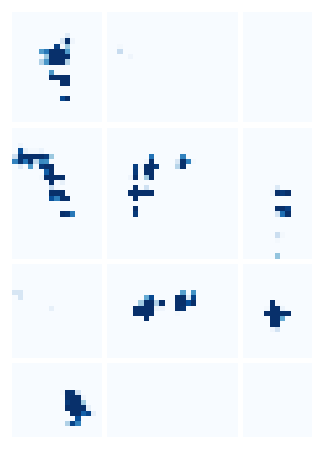

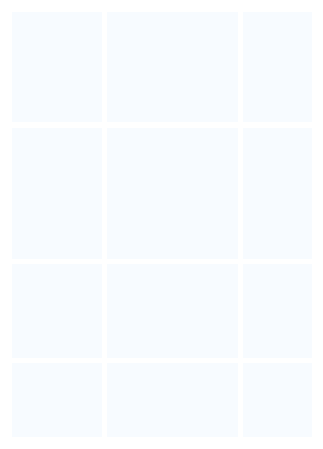

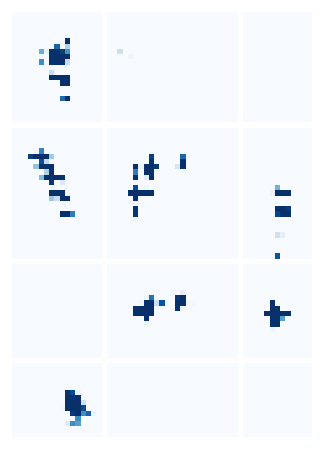

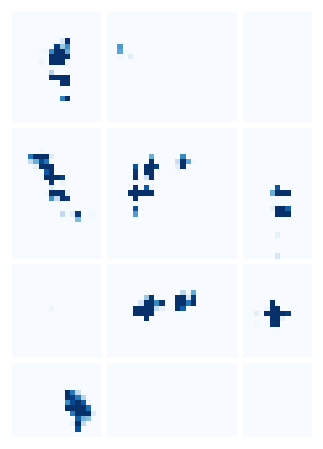

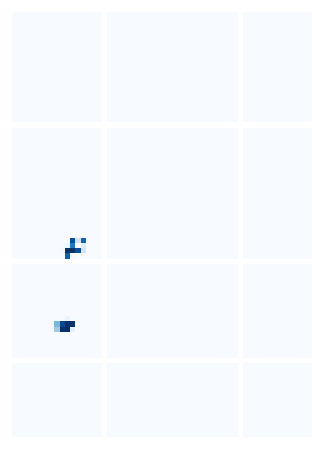

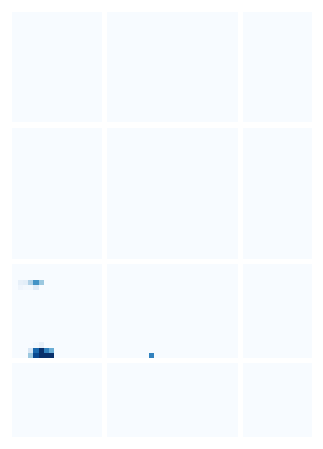

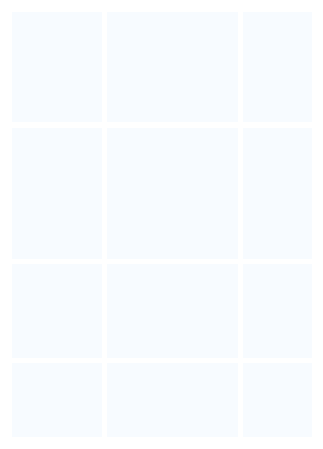

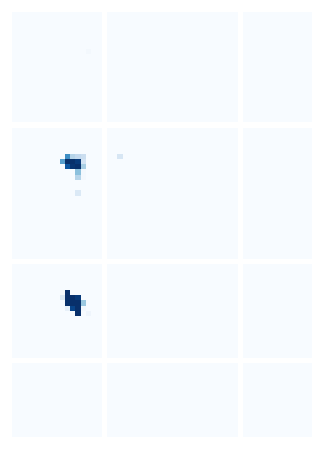

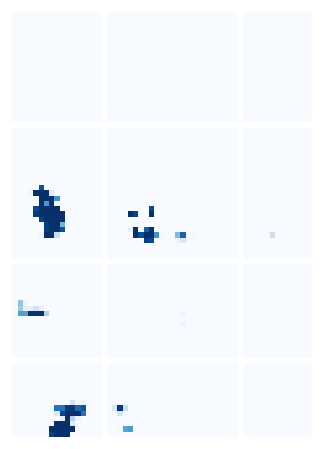

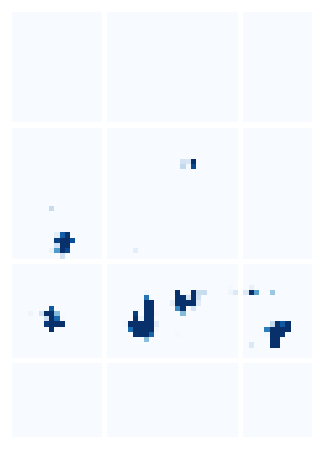

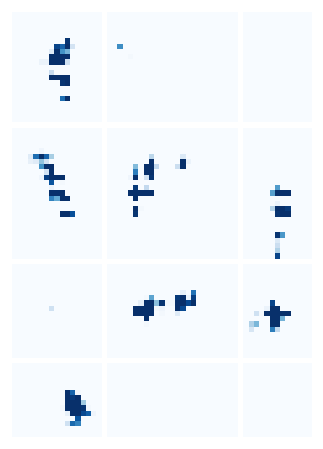

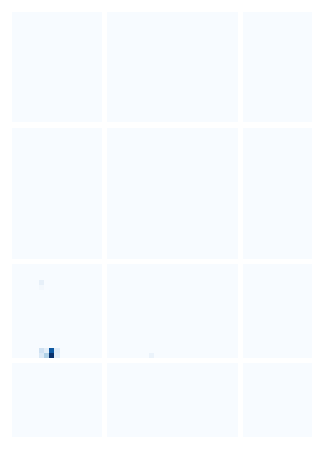

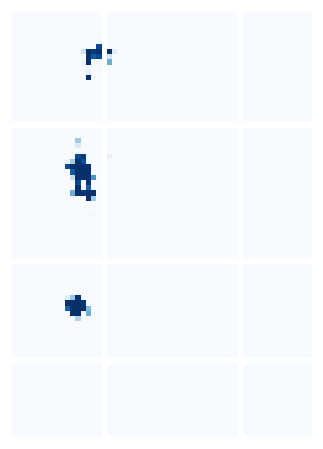

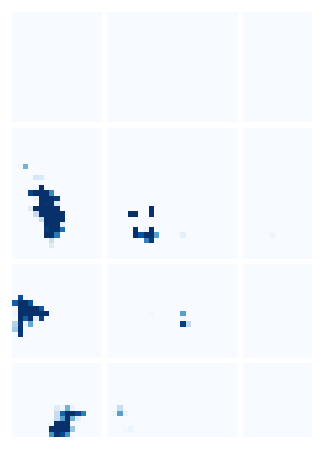

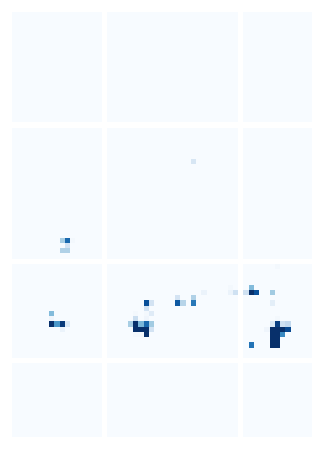

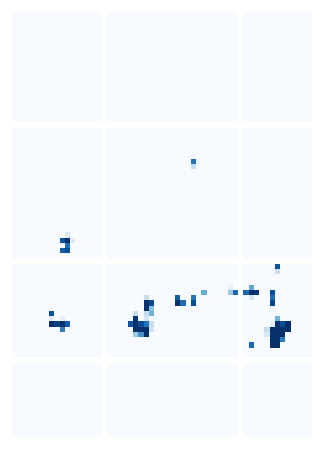

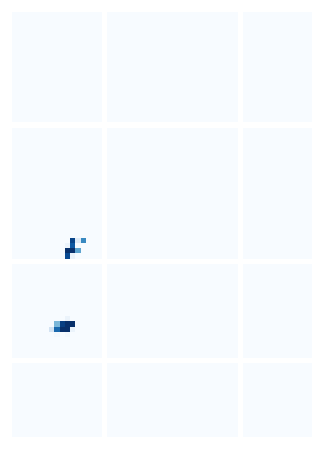

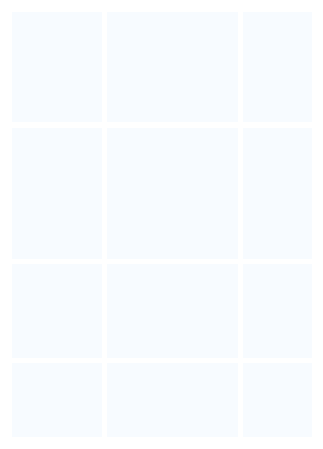

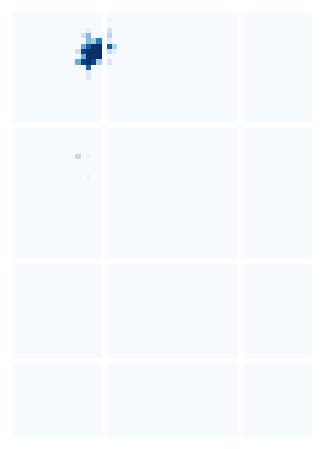

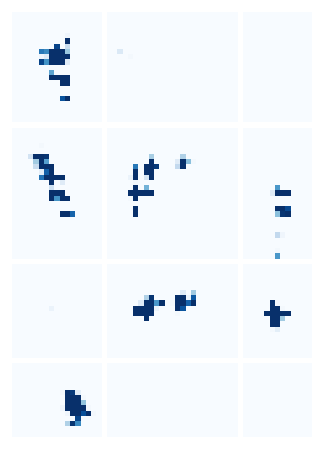

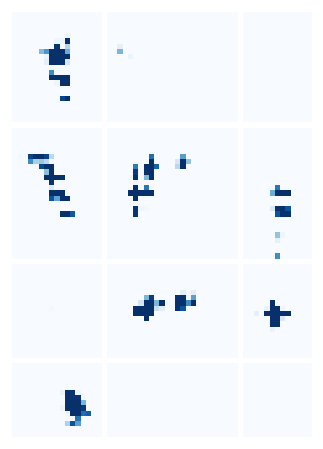

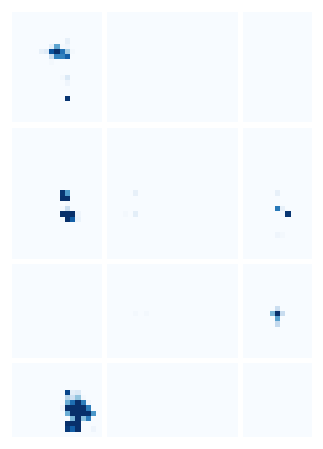

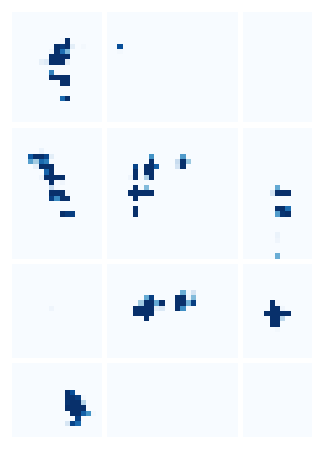

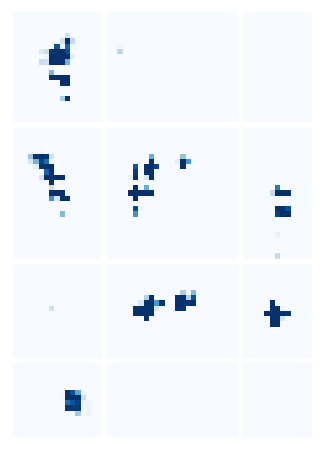

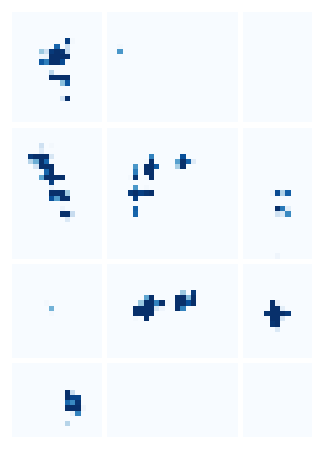

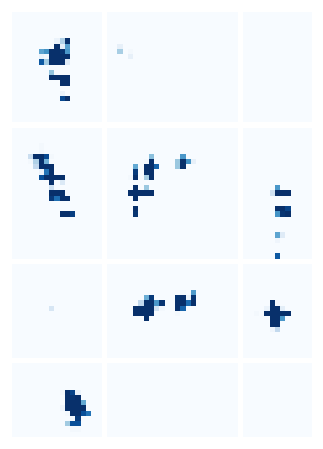

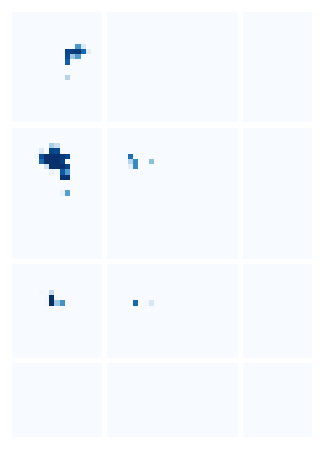

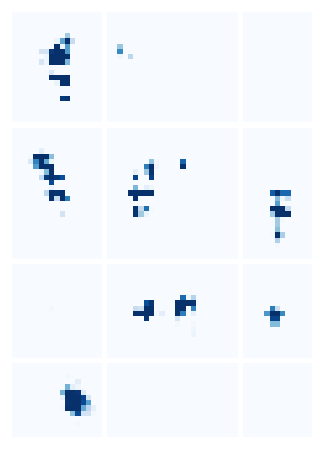

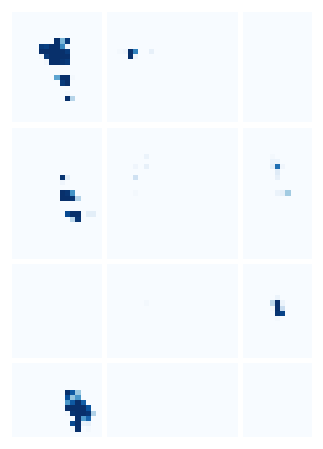

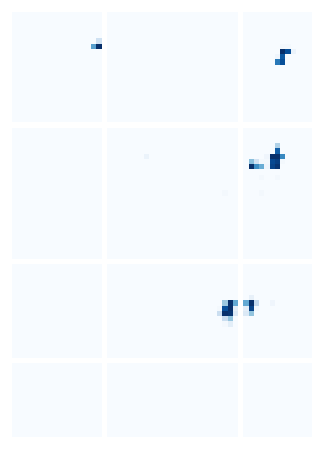

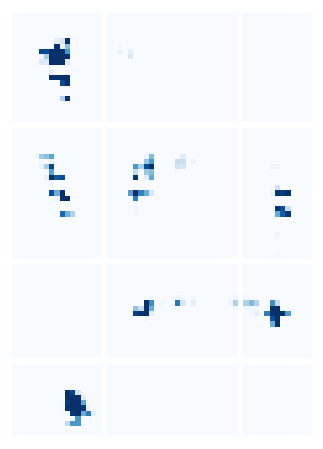

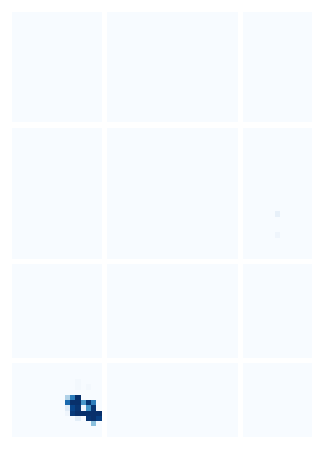

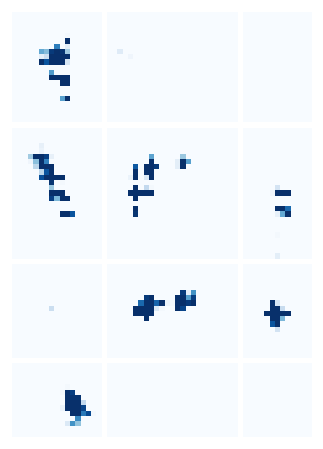

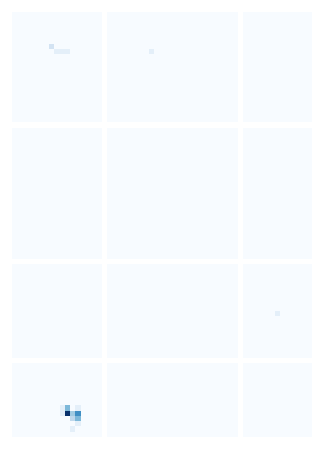

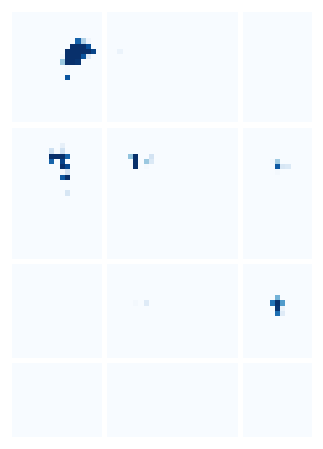

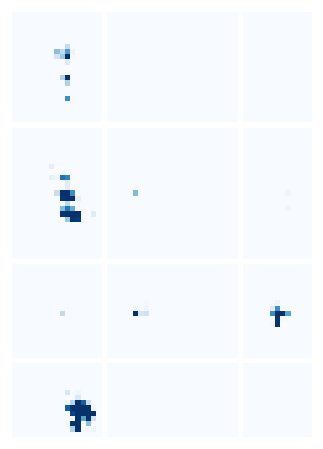

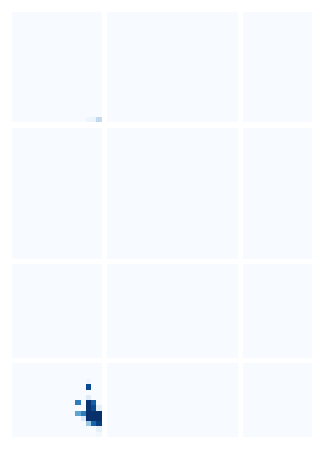

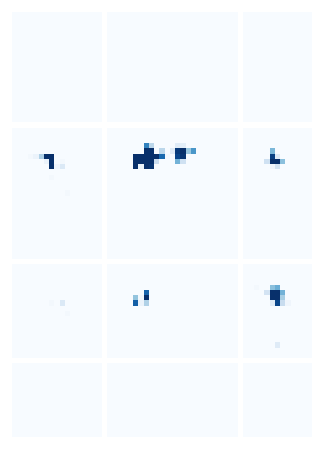

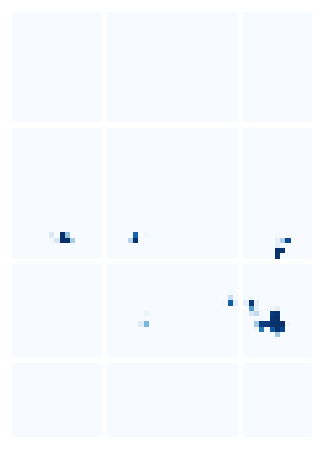

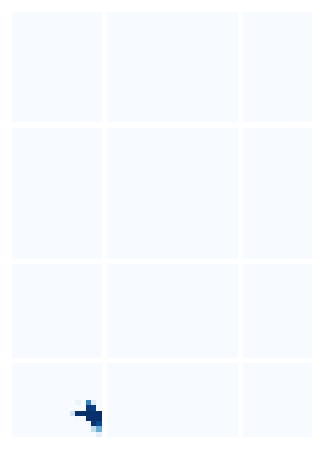

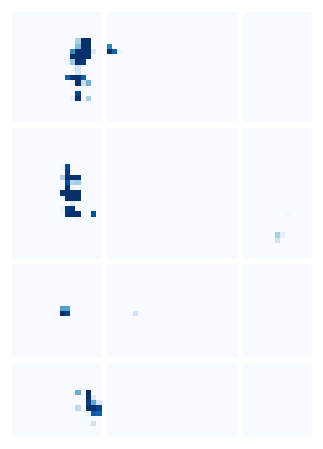

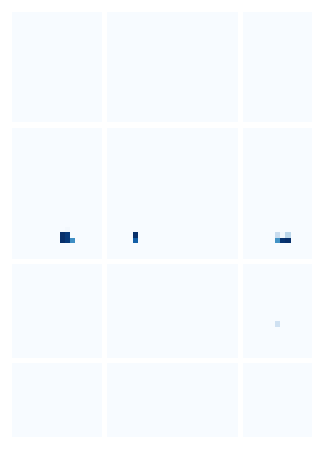

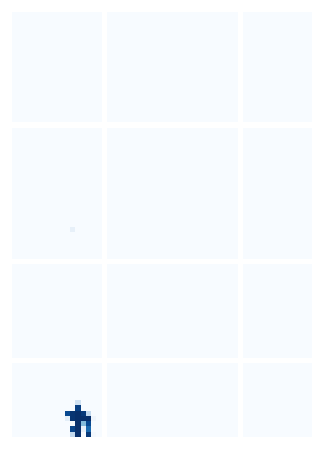

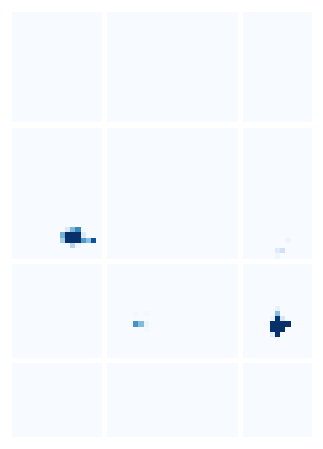

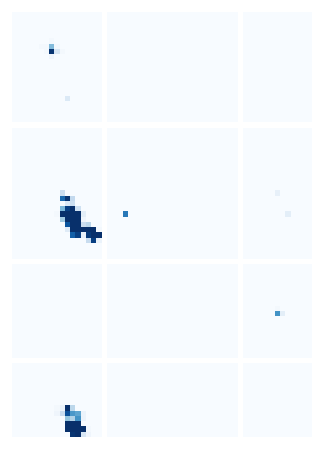

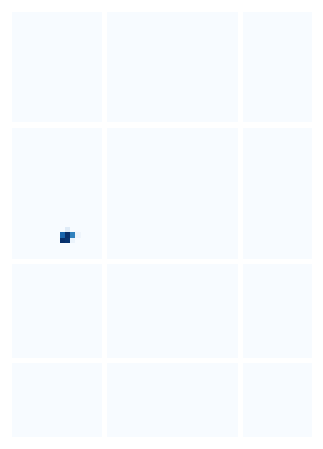

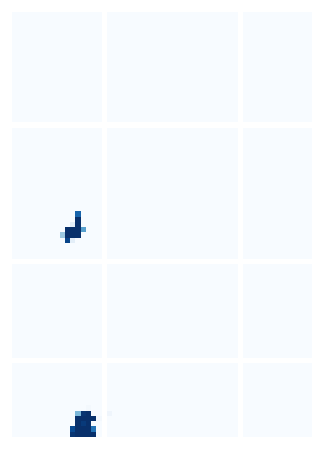

In [20]:
fig_savepath = 'cm_cluster_T'
os.makedirs(fig_savepath, exist_ok=True)

for i, row in df.iterrows(): 
    cm = row['contact_map']
    sys_name = row['sys_name']
    cluster_name = row['cluster_name']
    
    sys_path = f'{fig_savepath}/{sys_name}'
    os.makedirs(sys_path, exist_ok=True)
    
    save_fig = f'{sys_path}/{cluster_name}.png'
    fig, ax = plt.subplots(figsize=(10, 8)) 
    plt.imshow(cm_to_patches(cm.T, nsp16_int_res, nsp10_int_res, gap=1), cmap='Blues')
    plt.axis('off')
    fig.savefig(save_fig, dpi=300, bbox_inches='tight')